# Travel Insurance: Claim Status

## Business Problem Understanding

### Context

Asuransi Perjalanan adalah jenis asuransi yang memberikan perlindungan selama kita bepergian, baik di dalam negeri maupun luar negeri. Beberapa negara bahkan mewajibkan wisatawan untuk memiliki asuransi perjalanan, misalnya negara-negara di Eropa dan Amerika. Perusahaan Asuransi Perjalanan ingin mengetahui pelanggan yang layak menerima Claim dan tidak, berdasarkan data perusahaan asuransi yang merupakan data historis yang terdiri dari tujuan, produk asuransi, dan sebagainya.

Target:

0 tidak layak menerima claim

1 layak menerima claim

### Problem Statement

Perusahaan asuransi perjalanan bertujuan untuk memprediksi policyholder mana yang kemungkinan akan mengajukan klaim asuransi berdasarkan data historis. Memahami faktor-faktor yang berkontribusi terhadap klaim dapat membantu perusahaan mengelola risiko, efisiensi waktu dan meningkatkan penawaran mereka.


### Goals

Berdasarkan permasalahan tersebut, Perusahaan Asuransi ingin memprediksi kemungkinan user mana yang akan menerima klaim asuransi

Dan juga, perusahaan ingin mengetahui apa/faktor/variabel apa yang membuat seorang user mau claim atau tidak, sehingga mereka dapat membuat rencana yang lebih baik dalam meninjau kelayakan user menerima claim

### Analytic Approach

Pada Analytic Approach kita akan melakukan analisa data untuk menemukan pola apakah user layak melakukan Claim dan tidak layak melakukan Claim.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas user untuk melakukan Claim atau tidak.


### Evaluation Metrics

Keberhasilan model prediktif akan dievaluasi menggunakan hal-hal berikut:

**Accuracy**: Persentase Benarnya Prediksi

**Precision**: Akurasi prediksi positif

**Recall**: Kemampuan untuk mengidentifikasi kasus positif yang sebenarnya

**F1 Score**: Rata-rata harmonik presisi dan recall

**ROC-AUC**: Kemampuan model untuk membedakan antar kelas

**Confusion Metrics**:



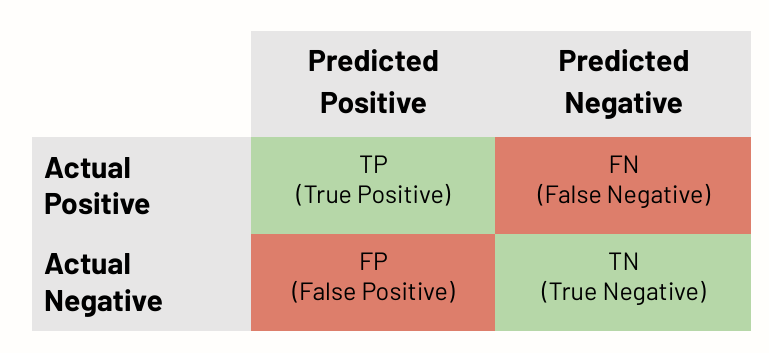

Type 1 Error: False Positive  
Konsekuensi: hilangnya margin karena user menerima claim walaupun tidak layak menerimanya

Type 2 Error:  False Negative
Konsekuensi: sia-sianya waktu, beban, dan kinerja perusahaan dalam pelayanan asuransi karena user tidak menerima Claim, meskipun sudah mengajukannya.

**Features**  
* Agency: Name of agency.
* Agency Type: Type of travel insurance agencies.
* Agency Type: Type of travel insurance agencies.
* Distribution Channel: Channel of travel insurance agencies.
* Product Name: Name of the travel insurance products.  
* Gender: Gender of insured.  
* Duration: Duration of travel.
* Destination: Destination of travel.
* Net Sales: Amount of sales of travel insurance policies.  
* Commission (in value): Commission received for travel insurance agency.
* Age: Age of insured.  
* **Claim: Claim status.**


## Data Understanding

### Install Libary

In [1]:
!pip install -qU autogluon pandas numpy matplotlib seaborn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.9/454.9 kB 21.6 MB/s eta 0:00

### Import Necessary Libary

In [2]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, FunctionTransformer, PowerTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from autogluon.tabular import TabularPredictor
from scipy.stats import probplot
from imblearn.over_sampling import SMOTE
from collections import Counter

sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

### Load Dataset

In [3]:
# Mounting to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Load Dataset
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/M2/Capstone 2")

In [5]:
# Load the dataset
df = pd.read_csv('dataset/data_travel_insurance.csv')

df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


### Attribute Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [7]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Duration,44328.0,49.424292,109.153961,-1.0,9.0,22.0,53.00,4881.0
Net Sales,44328.0,40.550948,48.661970,-357.5,18.0,26.5,48.00,810.0
Commision (in value),44328.0,9.707692,19.625637,0.0,0.0,0.0,11.55,283.5
Age,44328.0,39.925600,13.954926,0.0,35.0,36.0,43.00,118.0


Problem yang terlihat yaitu terdapat net sales yang negatif, duration yang negatif dan maximal duration yang terlalu tinggi, usia yang lebih dari 90 tahun

In [8]:
df.describe(include = 'object').T

,count,unique,top,freq
Agency,44328,16,EPX,24656
Agency Type,44328,2,Travel Agency,32113
Distribution Channel,44328,2,Online,43572
Product Name,44328,26,Cancellation Plan,12979
Gender,12681,2,M,6504
Destination,44328,138,SINGAPORE,9267
Claim,44328,2,No,43651


Terdapat banyak data unique pada destination, banyak data yang null pada Gender, dan labelnya categorical yang nanti akan diubah ke binary

## Data Cleaning

### Strandardize Column Name

Terdapat beberapa fitur/kolom yang terdapat whitespace, jadi kita akan mengubahnya dengan menggunakan underscore

In [9]:
df.rename(columns={'Commision (in value)': 'Commission',
                   'Agency Type': 'Agency_Type',
                   'Distribution Channel': 'Distribution_Channel',
                   'Product Name': 'Product_Name',
                   'Net Sales': 'Net_Sales'},inplace=True)

In [10]:
df.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Gender,Duration,Destination,Net_Sales,Commission,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


### Remove Duplicate

In [11]:
print(f"Number of duplicated rows:  {df.duplicated().sum()}")

Number of duplicated rows:  4667


In [12]:
df.drop_duplicates(inplace=True)
print(f"Number of duplicated rows:  {df.duplicated().sum()}")

Number of duplicated rows:  0


Terdapat 4662 data duplicate dan data duplicate sudah di hilangkan

### Missing Values

In [13]:
gender_nulls=df.Gender.isnull().sum()/len(df.Gender)

print(f"{round(gender_nulls*100,3)} % of the data is missing for the Gender column.")

69.759 % of the data is missing for the Gender column.


In [14]:
df.drop(['Gender'],axis=1, inplace=True)

Terdapat data Gender yang kosong dan kita akan menghapus Gender dengan alasan kolom gender dihapus adalah untuk analisa yang kita lakukan dan juga model ML yang nanti kita akan buat, tidak melakukan diskriminasi terhadap gender.

### Treating Outliers

Selain itu untuk Net_Sales, Duration dan Age kita sortir dulu ke value lebih besar dari 0

In [15]:
df = df[df.Net_Sales >= 0]
df.shape

(39183, 10)

In [16]:
df = df[df.Duration >= 0]
df.shape

(39181, 10)

In [17]:
df = df[df.Age >= 0]
df.shape

(39181, 10)

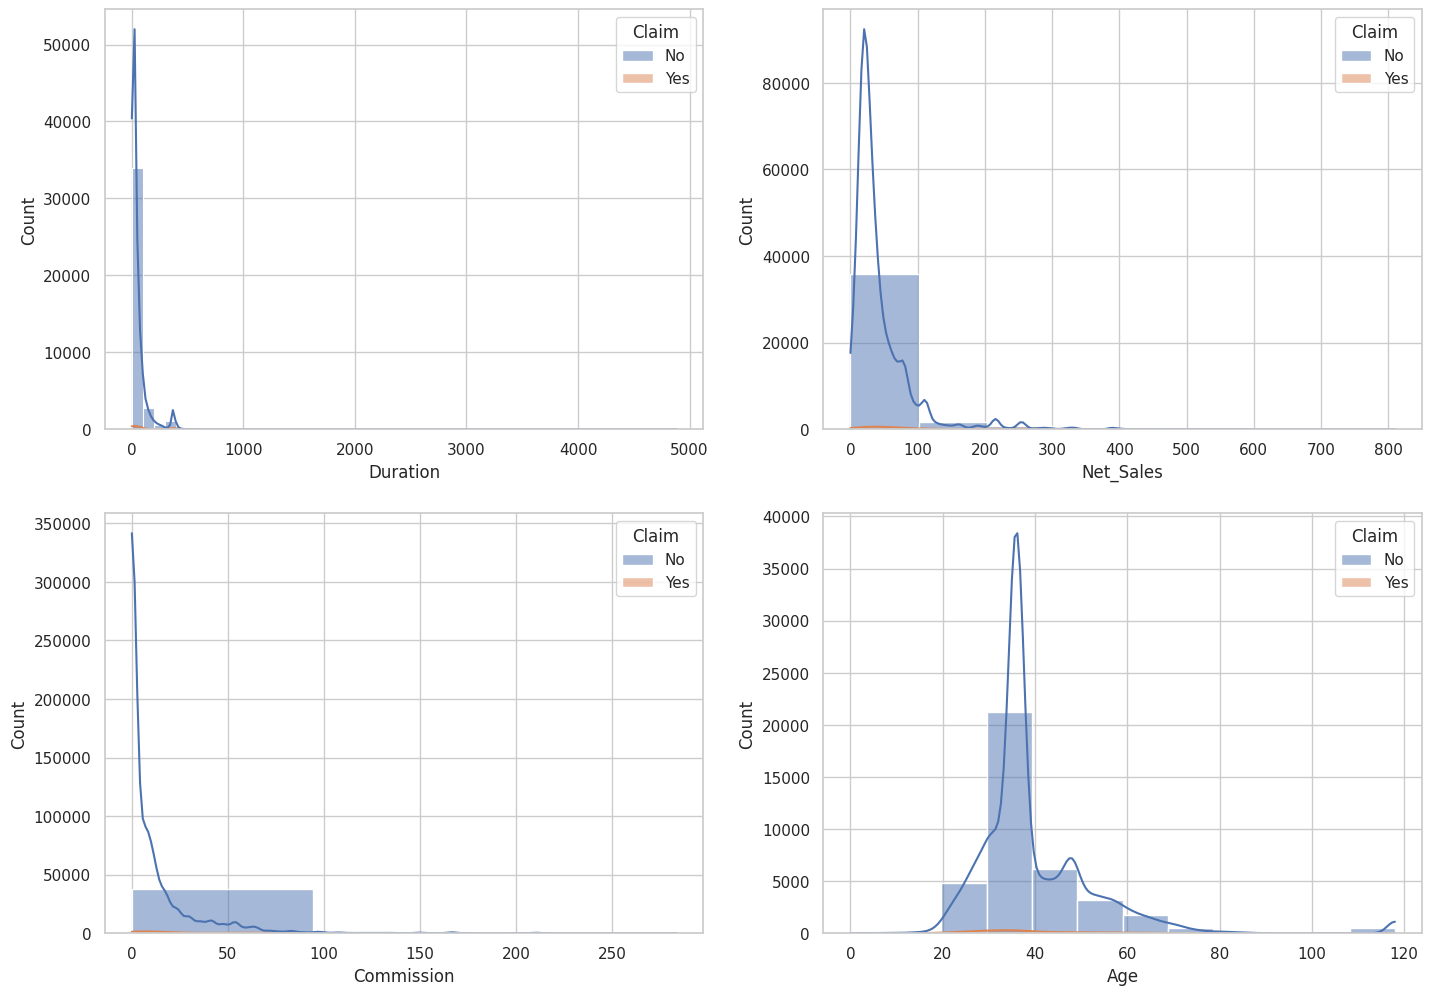

In [18]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df,x='Duration',binwidth=100, hue='Claim',kde=True)

plt.subplot(222)
sns.histplot(data=df,x='Net_Sales',binwidth=100, hue='Claim',kde=True)

plt.subplot(223)
sns.histplot(data=df,x='Commission',binwidth=100, hue='Claim',kde=True)

plt.subplot(224)
sns.histplot(data=df,x='Age',binwidth=10, hue='Claim',kde=True)

plt.show()

Kita harus memeriksa secara terpisah dari duration yang lebih besar dari 365 hari atau 1 tahun perjalanan, sepertinya itu adalah outlier

[Text(0, 0, '871'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '13')]

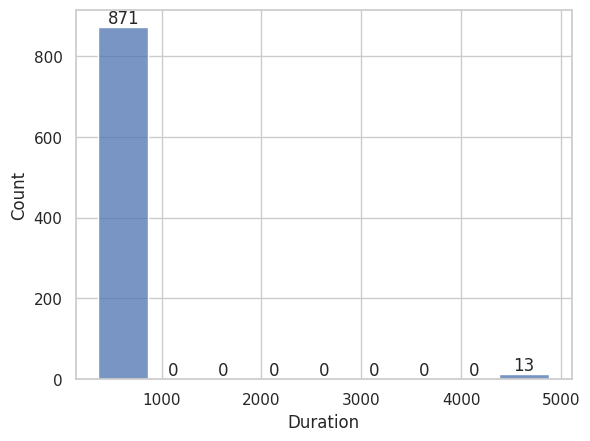

In [19]:
df_duration = df[df['Duration']>365]
ax = sns.histplot(data=df_duration, x="Duration",binwidth=500)
ax.bar_label(ax.containers[0])

Kita harus delete durasi perjalanan yang lebih dari 1 tahun perjalanan

In [20]:
df.drop(index=df[df['Duration']>365].index.values, inplace = True)

Kita juga akan memeriksa data Age secara terpisah, seperti yang terlihat bahwa Age diatas 100 sudah tidak memungkinkan untuk melakukan perjalanan

[Text(0, 0, '60'),
 Text(0, 0, '8'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '468')]

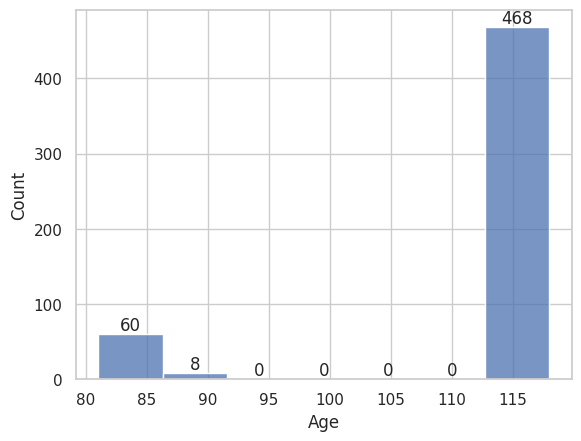

In [21]:
df_age = df[df['Age']>80]
ax = sns.histplot(data=df_age, x="Age",binwidth=5)
ax.bar_label(ax.containers[0])

Terlihat bahwa kita melihat data age diatas 90 tahun yang masih melakukan perjalanan, kita akan menghapus data diatas 90 tahun

In [22]:
df_old = df[df['Age']>90]
df.drop(index=df_old.index.values, inplace = True)

Ok kita sudah berhasil menghapus data perjalanan diatas 1 tahun karena kebanyakan agen penyedia asuransi tidak menyediakan asuransi untuk perjalanan lebih dari 1 tahun dan data usia diatas 90 tahun karena tidak memungkinkan manusia untuk melakukan perjalanan ketika usia sudah mencapai 90 tahun

## Exploratory Data Analysis

In [23]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.0,15,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, RAB, KML, SSI, TST, ADM, CCR, CBH, TTW]"
1,Agency_Type,object,0,0.0,2,"[Airlines, Travel Agency]"
2,Distribution_Channel,object,0,0.0,2,"[Online, Offline]"
3,Product_Name,object,0,0.0,26,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Gold Plan, Single Trip Travel Protect Platinum, Premier Plan, Annual Gold Plan, Annual Travel Protect Gold, Annual Travel Protect Silver, Spouse or Parents Comprehensive Plan, Individual Comprehensive Plan, Annual Travel Protect Platinum, Travel Cruise Protect Family, Child Comprehensive Plan]"
4,Duration,int64,0,0.0,331,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 53, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 65, 93, 71, 0, 76, 69, 110, 146, 116, 129, 84, 33, 149, 68, 64, 77, 101, 145, 88, ...]"
5,Destination,object,0,0.0,136,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, VENEZUELA, NEPAL, SOUTH AFRICA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
6,Net_Sales,float64,0,0.0,854,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 227.7, 48.5, 24.0, 161.0, 99.0, 59.4, 45.0, 44.0, 19.0, 75.0, 39.0, 17.55, 51.0, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 37.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 128.0, 43.0, 66.0, 26.5, 0.19, 83.0, 35.5, 13.5, 63.5, 73.0, 13.0, 1.61, 102.0, ...]"
7,Commission,float64,0,0.0,866,"[54.0, 0.0, 7.7, 4.0, 9.1, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 6.0, 136.62, 31.53, 11.55, 40.25, 59.4, 35.64, 15.75, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 63.21, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 12.95, 3.23, 15.93, 3.74, 16.25, 9.2, 4.38, 3.75, 0.32, ...]"
8,Age,int64,0,0.0,88,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 51, 65, 47, 35, 54, 23, 46, 58, 42, 31, 29, 37, 68, 8, 32, 61, 

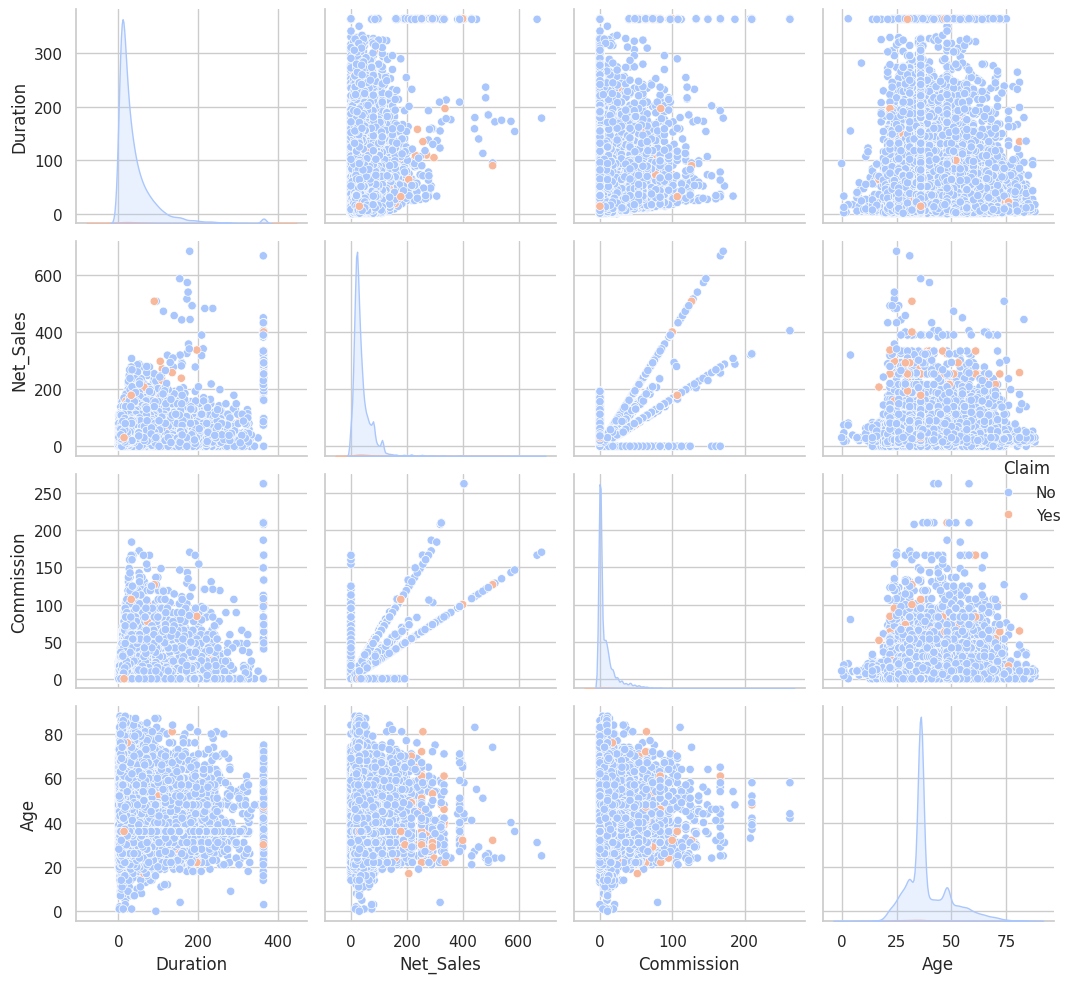

In [24]:
sns.pairplot(df,hue='Claim',palette='coolwarm')
plt.tight_layout();

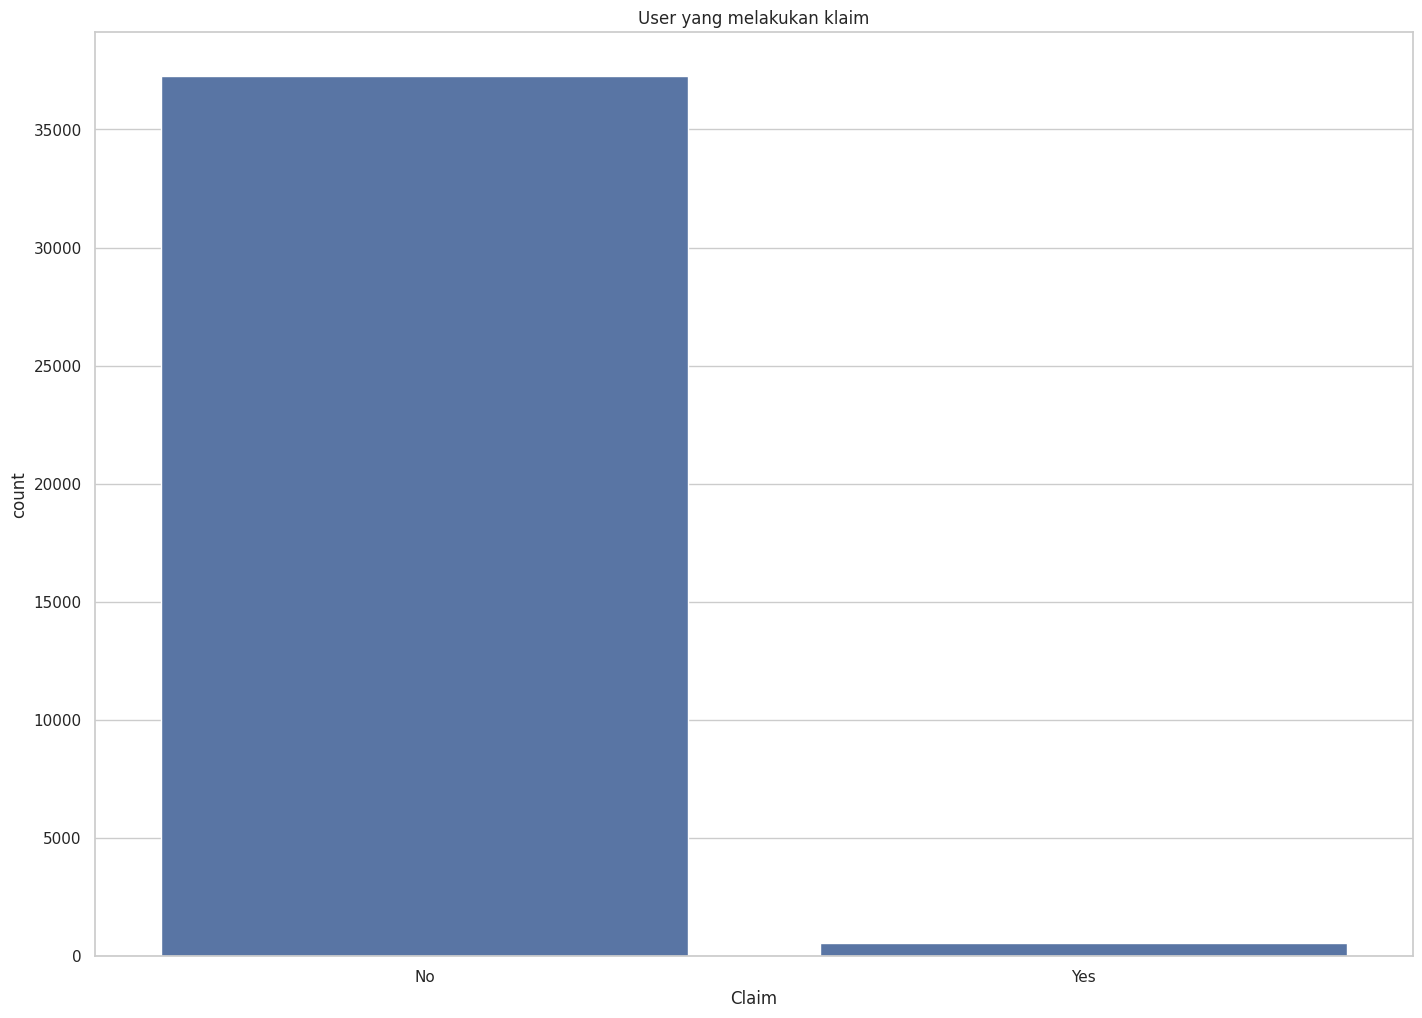

In [25]:
# Claim
plt.figure(figsize=(17,12))

sns.countplot(data=df,x='Claim')
plt.title('User yang melakukan klaim')
plt.show();

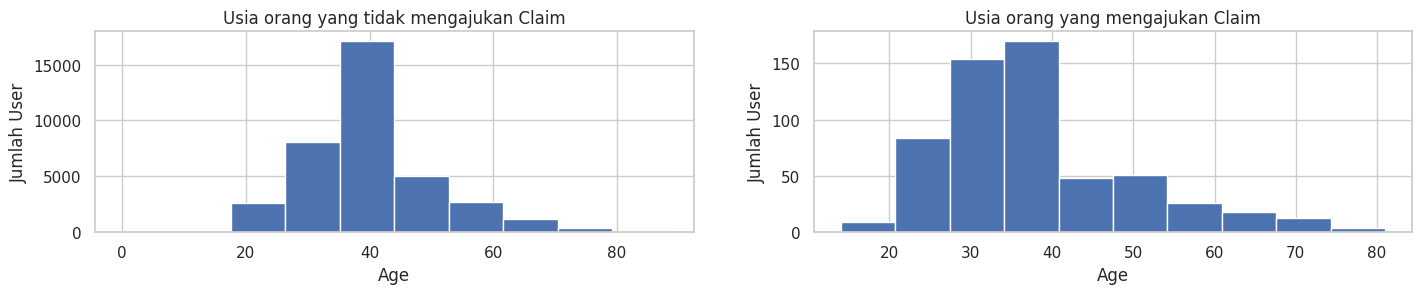

In [26]:
# Age

plt.figure(figsize=(17,12))

plt.subplot(421)
plt.hist(df[df['Claim']=='No']['Age'])
plt.xlabel('Age')
plt.ylabel('Jumlah User')
plt.title('Usia orang yang tidak mengajukan Claim')

plt.subplot(422)
plt.hist(df[df['Claim']=='Yes']['Age'])
plt.xlabel('Age')
plt.ylabel('Jumlah User')
plt.title('Usia orang yang mengajukan Claim')

plt.show()

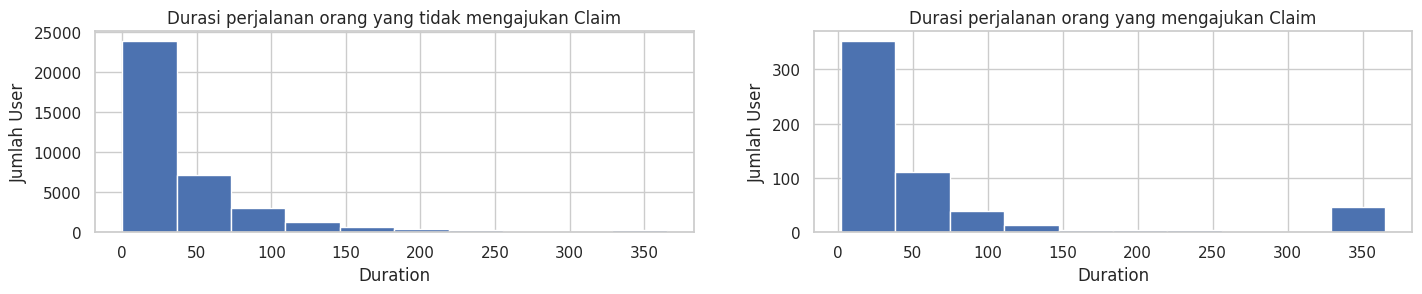

In [27]:
# Duration

plt.figure(figsize=(17,12))

plt.subplot(421)
plt.hist(df[df['Claim']=='No']['Duration'])
plt.xlabel('Duration')
plt.ylabel('Jumlah User')
plt.title('Durasi perjalanan orang yang tidak mengajukan Claim')

plt.subplot(422)
plt.hist(df[df['Claim']=='Yes']['Duration'])
plt.xlabel('Duration')
plt.ylabel('Jumlah User')
plt.title('Durasi perjalanan orang yang mengajukan Claim')

plt.show()

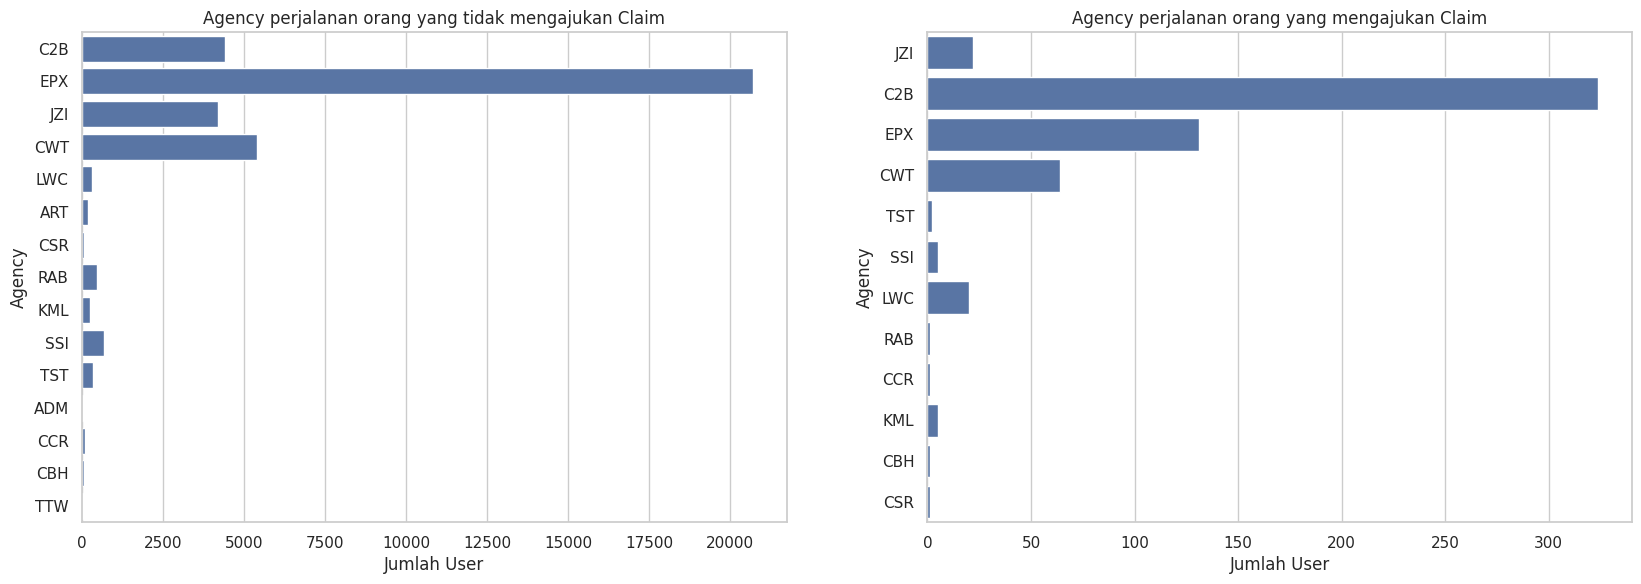

In [28]:
# Agency

plt.figure(figsize=(20,14))

plt.subplot(221)
sns.countplot(df[df['Claim']=='No']['Agency'])
plt.xlabel('Jumlah User')
plt.ylabel('Agency')
plt.title('Agency perjalanan orang yang tidak mengajukan Claim')

plt.subplot(222)
sns.countplot(df[df['Claim']=='Yes']['Agency'])
plt.xlabel('Jumlah User')
plt.ylabel('Agency')
plt.title('Agency perjalanan orang yang mengajukan Claim')

plt.show()

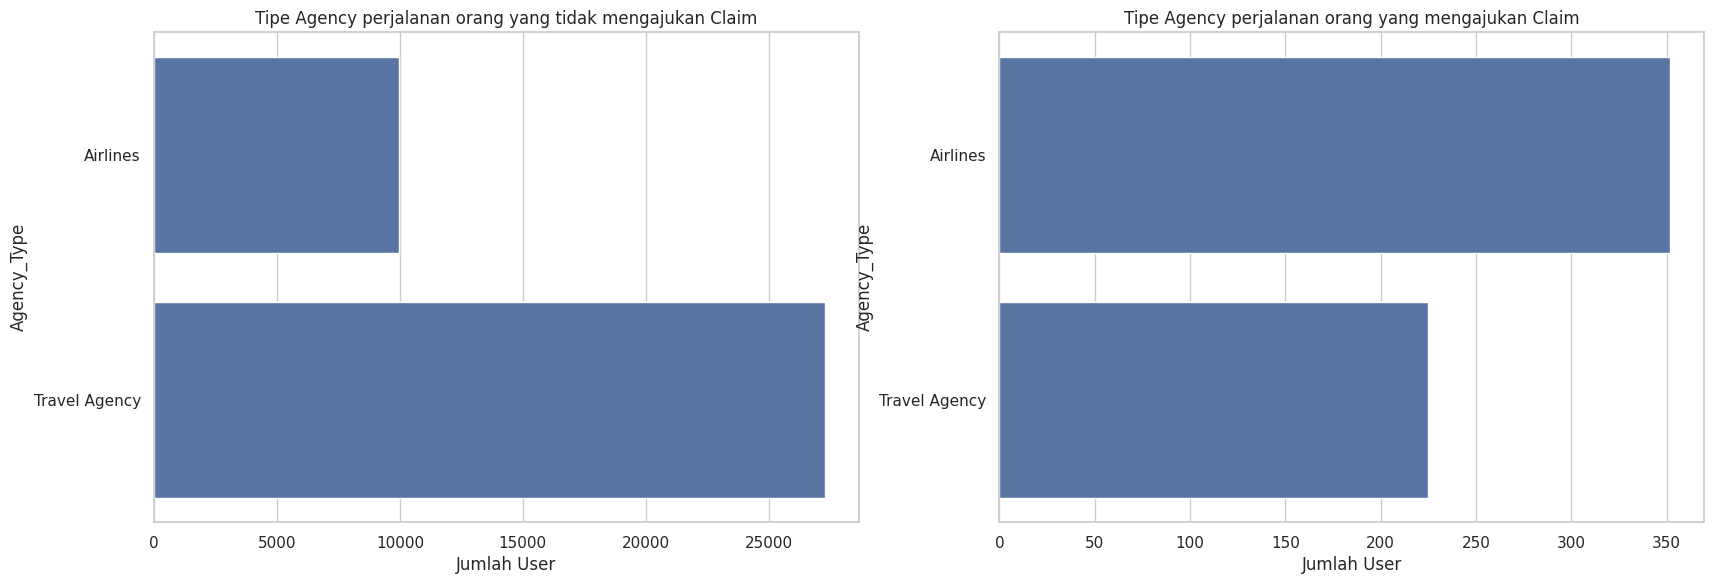

In [29]:
# Agency Type

plt.figure(figsize=(20,14))

plt.subplot(221)
sns.countplot(df[df['Claim']=='No']['Agency_Type'])
plt.xlabel('Jumlah User')
plt.title('Tipe Agency perjalanan orang yang tidak mengajukan Claim')

plt.subplot(222)
sns.countplot(df[df['Claim']=='Yes']['Agency_Type'])
plt.xlabel('Jumlah User')
plt.title('Tipe Agency perjalanan orang yang mengajukan Claim')

plt.show()

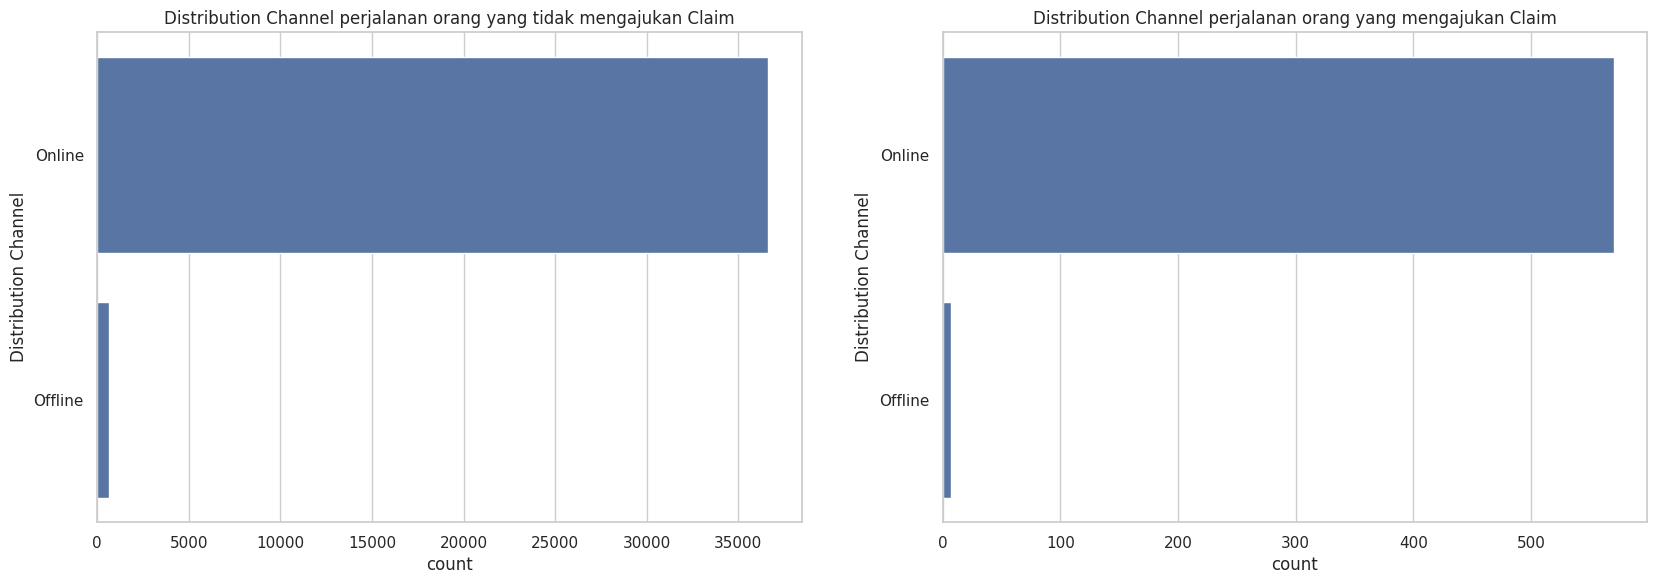

In [30]:
# Distribution Channel

plt.figure(figsize=(20,14))

plt.subplot(221)
sns.countplot(df[df['Claim']=='No']['Distribution_Channel'])
plt.ylabel('Distribution Channel')
plt.title('Distribution Channel perjalanan orang yang tidak mengajukan Claim')

plt.subplot(222)
sns.countplot(df[df['Claim']=='Yes']['Distribution_Channel'])
plt.ylabel('Distribution Channel')
plt.title('Distribution Channel perjalanan orang yang mengajukan Claim')

plt.show()

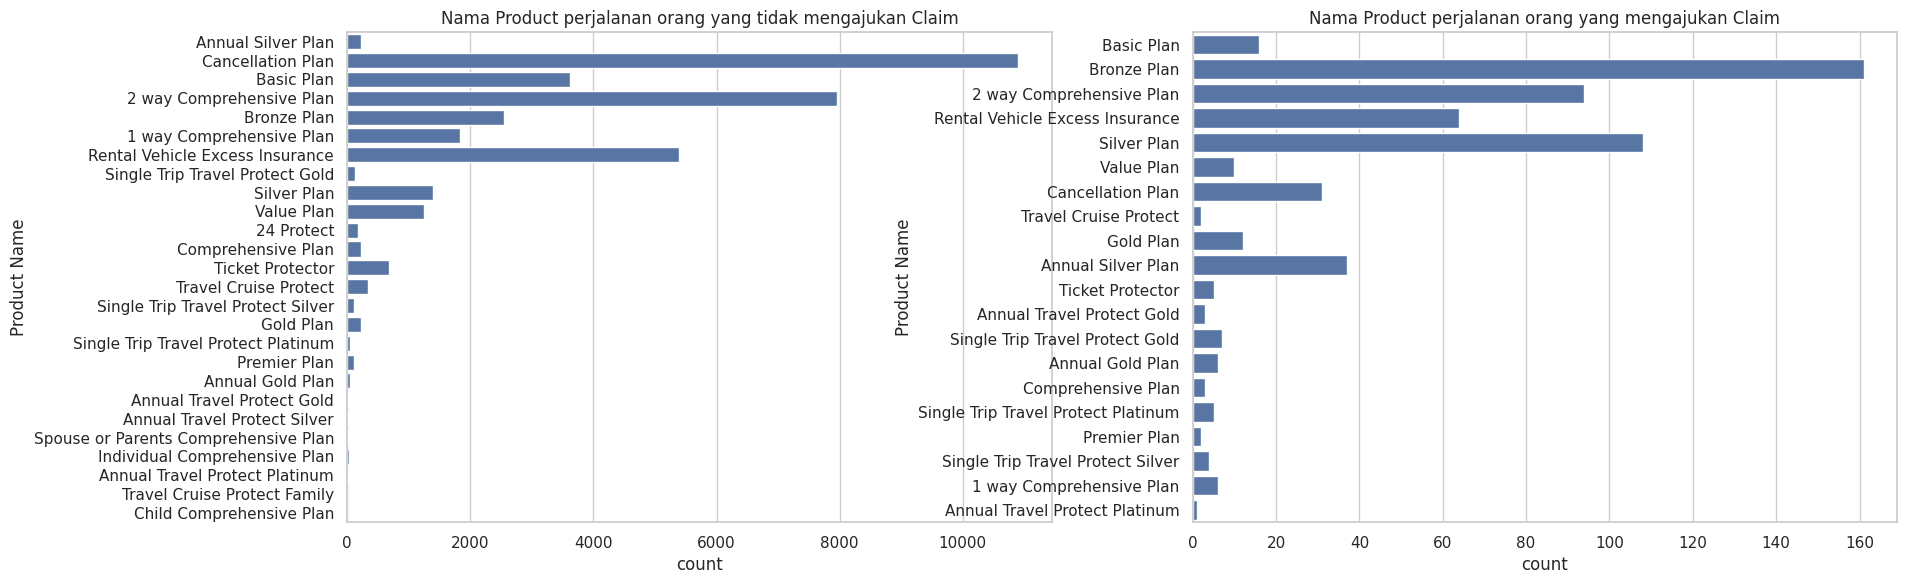

In [31]:
# Product Name

plt.figure(figsize=(20,14))

plt.subplot(221)
sns.countplot(df[df['Claim']=='No']['Product_Name'])
plt.ylabel('Product Name')
plt.title('Nama Product perjalanan orang yang tidak mengajukan Claim')

plt.subplot(222)
sns.countplot(df[df['Claim']=='Yes']['Product_Name'])
plt.ylabel('Product Name')
plt.title('Nama Product perjalanan orang yang mengajukan Claim')

plt.show()

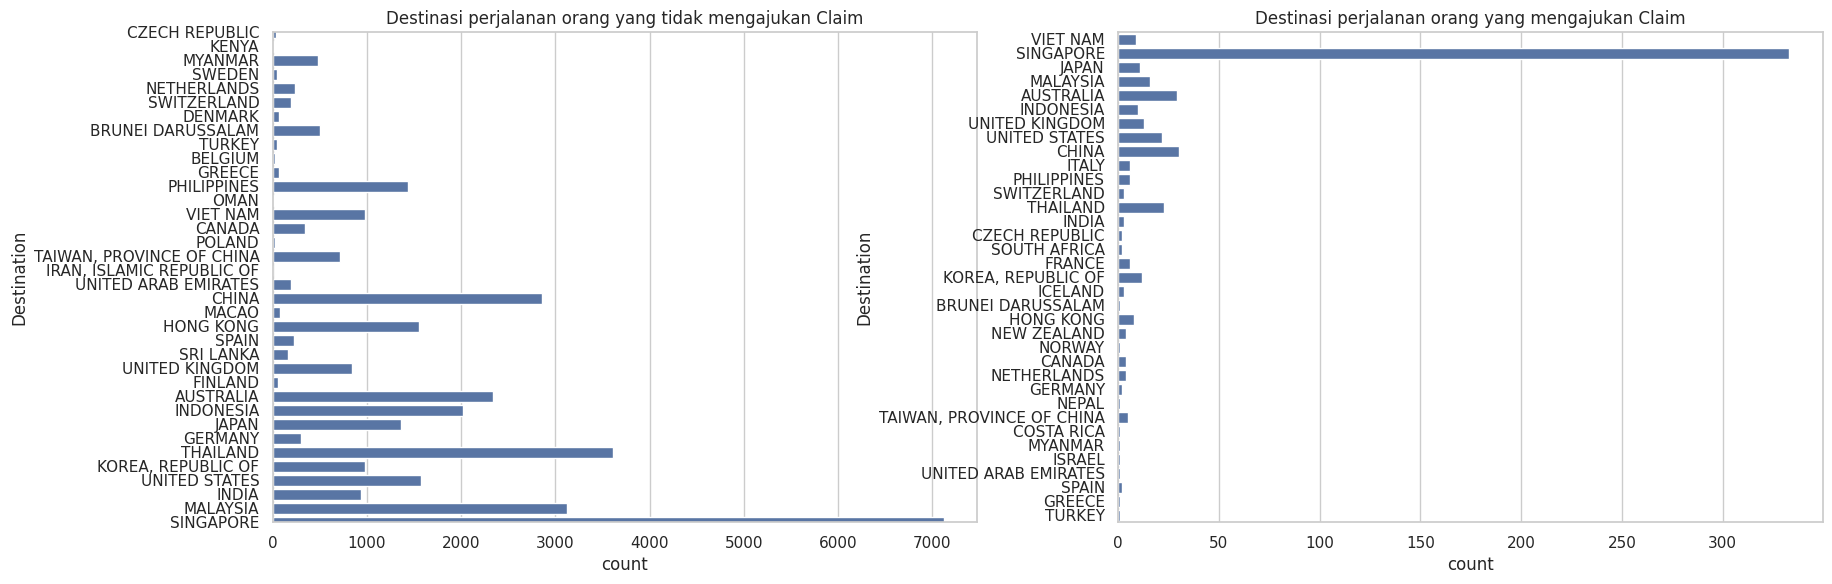

In [32]:
# Destination

plt.figure(figsize=(20,14))

plt.subplot(221)
sns.countplot(df[df['Claim']=='No']['Destination'])
plt.ylim(0, 35)
plt.ylabel('Destination')
plt.title('Destinasi perjalanan orang yang tidak mengajukan Claim')

plt.subplot(222)
sns.countplot(df[df['Claim']=='Yes']['Destination'])
plt.ylabel('Destination')
plt.title('Destinasi perjalanan orang yang mengajukan Claim')

plt.show()

Berdasarkan barplot diatas kita dapat menyimpulkan beberapa hal :

* Claim paling banyak ditemui pada agensi C2B kemudian EPX, dan CWT.
* Claim paling banyak ditemui pada agensi yang bergerak di bidang Airlines dibandingkan Travel.
* User lebih banyak melakukan Claim melalui kanal daring (Online) dibandingkan kanal tatap muka (Offline).
* 5 Produk yang memiliki ratio Claim paling besar adalah Bronze Plan, Silver Plan, 2 Way Comprehensive Plan, Rental Vehicle Excess Insurance, Annual Silver Plan.
* 5 destinasi terpopuler oleh user yang mengajukan Claim adalah Singapura, China, Australia, Thailand, dan Amerika.
* Mayoritas user melakukan perjalanan berdurasi kurang dari 50 hari
* Mayoritas user yang mengajukan Claim berusia sekitar 26-39 tahun. Meski demikian, sebagian besar user secara keseluruhan berusia sekitar 20-65 tahun.

Mayoritas user tidak melakukan claim. Hal ini menunjukkan bahwa dataset ini sangat tidak seimbang dan perlu diseimbangkan menggunakan Synthetic Minority Oversampling TEchnique `SMOTE` agar tidak berdampak negatif pada kinerja algoritma Machine Learning.

## Data Preparation

### Encoding the data

In [33]:
# Create copy of the dataframe
df_prepared = df.copy()

# Label encode categorical variables
le = LabelEncoder()
categorical_columns = ['Agency', 'Agency_Type', 'Distribution_Channel', 'Product_Name', 'Claim', 'Destination']

for col in categorical_columns:
    df_prepared[col] = le.fit_transform(df_prepared[col])

### Splitting the Data

In [34]:
# Split features and target
X = df_prepared.drop('Claim', axis=1)
y = df_prepared['Claim']

Split data features dan target X dan y

In [35]:
# Using SMOTE
oversampler = SMOTE()
X, y = oversampler.fit_resample(X, y)

In [36]:
print("Distribution of class in target variable y(Claim):",Counter(y))

Distribution of class in target variable y(Claim): Counter({0: 37252, 1: 37252})


In [37]:
print("New shape of the dataset:",X.shape)

New shape of the dataset: (74504, 9)


Data sudah diseimbangkan menggunakan SMOTE

In [38]:
# Divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data sudah di pisahkan untuk Train and Test

## Model Development

### Initialize and Train the model

In [39]:
# Combine features and target for AutoGluon
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)

Training set shape: (59603, 10)
Testing set shape: (14901, 10)


In [40]:
# Initialize and train AutoGluon model
predictor = TabularPredictor(label='Claim', eval_metric='accuracy')
predictor.fit(train_data, time_limit=600)  # Train for 10 minutes

No path specified. Models will be saved in: "AutogluonModels/ag-20251002_064415"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Sep  6 09:54:41 UTC 2025
CPU Count:          2
Memory Avail:       11.06 GB / 12.67 GB (87.3%)
Disk Space Avail:   15.14 GB / 30.00 GB (50.5%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme' : New in v1.4: Massively better than 'best' on datasets <30000 samples by using new models meta-learned on https://tabarena.ai: TabPFNv2, TabICL, Mitra, and TabM. Absolute best accuracy. Requires a GPU. Recommended 64 GB CPU memory and 32+ GB GPU mem

[1000]	valid_set's binary_error: 0.0896
[2000]	valid_set's binary_error: 0.0708
[3000]	valid_set's binary_error: 0.0612
[4000]	valid_set's binary_error: 0.0544
[5000]	valid_set's binary_error: 0.0492
[6000]	valid_set's binary_error: 0.0464
[7000]	valid_set's binary_error: 0.0468
[8000]	valid_set's binary_error: 0.044
[9000]	valid_set's binary_error: 0.0412
[10000]	valid_set's binary_error: 0.0416


	0.9592	 = Validation score   (accuracy)
	51.45s	 = Training   runtime
	5.97s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 541.49s of the 541.49s of remaining time.
	Fitting with cpus=1, gpus=0, mem=0.0/10.8 GB


[1000]	valid_set's binary_error: 0.0404
[2000]	valid_set's binary_error: 0.0332
[3000]	valid_set's binary_error: 0.0296
[4000]	valid_set's binary_error: 0.0268
[5000]	valid_set's binary_error: 0.0244
[6000]	valid_set's binary_error: 0.0244
[7000]	valid_set's binary_error: 0.0236
[8000]	valid_set's binary_error: 0.0244
[9000]	valid_set's binary_error: 0.0248


	0.9768	 = Validation score   (accuracy)
	29.31s	 = Training   runtime
	2.78s	 = Validation runtime
Fitting model: RandomForestGini ... Training model for up to 508.26s of the 508.26s of remaining time.
	Fitting with cpus=2, gpus=0, mem=0.0/10.8 GB
	0.9724	 = Validation score   (accuracy)
	16.61s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: RandomForestEntr ... Training model for up to 491.07s of the 491.07s of remaining time.
	Fitting with cpus=2, gpus=0, mem=0.0/10.6 GB
	0.9704	 = Validation score   (accuracy)
	19.93s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 470.59s of the 470.59s of remaining time.
	Fitting with cpus=1, gpus=0
	0.9712	 = Validation score   (accuracy)
	276.61s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ... Training model for up to 193.77s of the 193.77s of remaining time.
	Fitting with cpus=2, gpus=0, mem=0.0/10.4 GB
	0.9672	 = Validation score   

AutoGluon digunakan untuk melatih beberapa model dan menemukan model dengan kinerja terbaik.

**Apa yang dilakukan autoGluon:**

`Label = 'Claim'`: kita memberi tahu kepada autoGluon bahwa target variablenya itu kolom Claim      
`time_limit = 600`: Ini digunakan untuk limitasi model training selama 10 menit



* AutoGluon melatih beberapa model yang beragam, seperti (LightGBM, CatBoost, Random Forest, Neural Networks, etc.)
* Otomatis Hyperparameter Tuning untuk model dengan kinerja terbaik untuk memaksimalkan metrik Accuracy.
* Otomatis Saving the model



Setelah train model, selanjutnya kita akan melakukan prediksi terhadap test data

In [41]:
# Start to predict
predictions = predictor.predict(test_data)

setelah modelnya diprediksi, kita akan lanjut ke tahap evaluate model

### Evaluate the model

In [42]:
# Model Evaluation
predictor.evaluate(test_data)

{'accuracy': 0.973357492785719,
 'balanced_accuracy': np.float64(0.9734315000170246),
 'mcc': 0.9470193425300525,
 'roc_auc': np.float64(0.9951194305970836),
 'f1': 0.9735315687712515,
 'precision': 0.9615435269327012,
 'recall': 0.9858223062381852}

In [43]:
# View model leaderboard
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.973357,0.9796,accuracy,10.630004,3.051998,65.952581,0.006884,0.000917,0.106166,2,True,11
1,RandomForestGini,0.971814,0.9724,accuracy,0.630269,0.137929,16.607058,0.630269,0.137929,16.607058,1,True,3
2,RandomForestEntr,0.971814,0.9704,accuracy,0.663291,0.128433,19.929641,0.663291,0.128433,19.929641,1,True,4
3,LightGBM,0.971613,0.9768,accuracy,9.329561,2.784718,29.309716,9.329561,2.784718,29.309716,1,True,2
4,CatBoost,0.970539,0.9712,accuracy,0.137352,0.024519,276.614790,0.137352,0.024519,276.614790,1,True,5
5,ExtraTreesEntr,0.969599,0.9664,accuracy,1.747441,0.162002,6.826285,1.747441,0.162002,6.826285,1,True,7
6,ExtraTreesGini,0.968995,0.9672,accuracy,1.267023,0.320346,8.316785,1.267023,0.320346,8.316785,1,True,6
7,XGBoost,0.963962,0.9632,accuracy,1.824796,0.345275,10.187106,1.824796,0.345275,10.187106,1,True,9
8,LightGBMXT,0.958191,0.9592,accuracy,26.187155,5.970567,51.445928,26.187155,5.970567,51.445928,1,True,1
9,NeuralNetTorch,0.911751,0.9132,accuracy,0.068778,0.015292,101.024049,0.068778,0.015292,101.024049,1,True,10


Terlihat bahwa model WeightedEnsemble adalah yang terbaik untuk accuracy dari setiap model yang menggunakan AutoGluon.

Semua model terlihat robust baik di saat training maupun testing

### Classification Report

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      7495
           1       0.96      0.99      0.97      7406

    accuracy                           0.97     14901
   macro avg       0.97      0.97      0.97     14901
weighted avg       0.97      0.97      0.97     14901



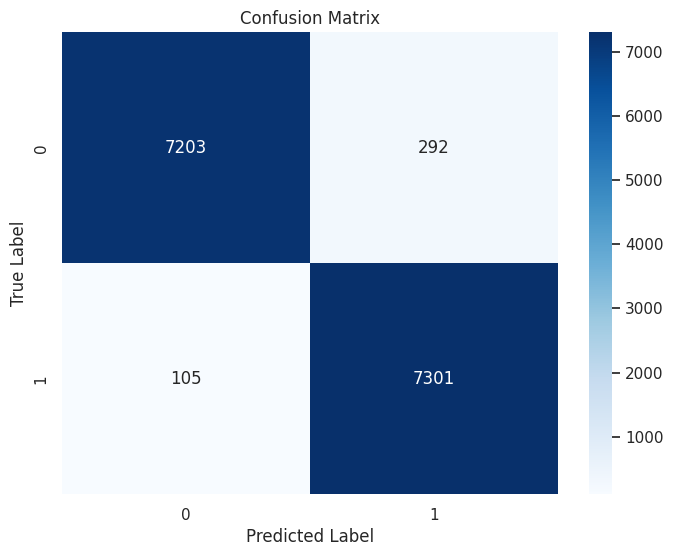

In [44]:
# Make predictions
y_pred = predictor.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Confusion Matrix:

* Jumlah User yang mengajukan Claim dan layak menerima Claim (True Positive): 7203
* Jumlah User yang tidak mengajukan Claim dan tidak layak menerima Claim (True Negative): 7301
* Jumlah User yang mengajukan Claim namun tidak layak menerima Claim (False Negative): 292
* Jumlah User yang tidak mengajukan Claim namun layak menerima Claim (False Positive): 105


Classification Report:

* `Recall:` Model memprediksi 292 user yang harusnya layak menerima claim tapi ditolak 7203 **TN** / (7203 **TN** + 292 **FN**) = 96.09%
* `Precision:` Model memprediksi 105 user yang layak menerima claim tapi tidak mengajukan claim 7203 **TN** (7203 **TN** + 105 **FP**) = 98.78%
* `Accuracy:` Model dapat dengan benar memprediksi 14,505 dari 14,901 total instances (7301 **TP** + 7203 **TN**) / 14901 = 97.44%

**Note:** Nilai Confusion metrics dapat berubah-ubah dikarenakan metricsnya pun berubah-ubah tiap train model

### Feature Importances

In [45]:
# Evaluation data without the target column 'Claim'
feature_importances = predictor.feature_importance(train_data)

# Display the results
print(feature_importances.head(10))


Computing feature importance via permutation shuffling for 9 features using 5000 rows with 5 shuffle sets...
	227.08s	= Expected runtime (45.42s per shuffle set)
	187.03s	= Actual runtime (Completed 5 of 5 shuffle sets)


                      importance    stddev       p_value  n  p99_high  \
Net_Sales                0.20232  0.004134  2.091077e-08  5  0.210832   
Duration                 0.20124  0.005410  6.261692e-08  5  0.212379   
Product_Name             0.11996  0.005622  5.772430e-07  5  0.131536   
Commission               0.10528  0.004533  4.115598e-07  5  0.114614   
Age                      0.10400  0.004705  5.014397e-07  5  0.113688   
Destination              0.07488  0.003969  9.435486e-07  5  0.083052   
Agency_Type              0.03904  0.001797  5.367643e-07  5  0.042739   
Agency                   0.03612  0.002134  1.454043e-06  5  0.040513   
Distribution_Channel     0.00088  0.000576  1.345095e-02  5  0.002066   

                       p99_low  
Net_Sales             0.193808  
Duration              0.190101  
Product_Name          0.108384  
Commission            0.095946  
Age                   0.094312  
Destination           0.066708  
Agency_Type           0.035341  
Agenc

In [46]:
feature_importances_sorted = feature_importances.sort_values(
    by=feature_importances.columns[0],  # Sorts by the primary importance score column
    ascending=False
)
features = feature_importances_sorted.index
scores = feature_importances_sorted.iloc[:, 0].values

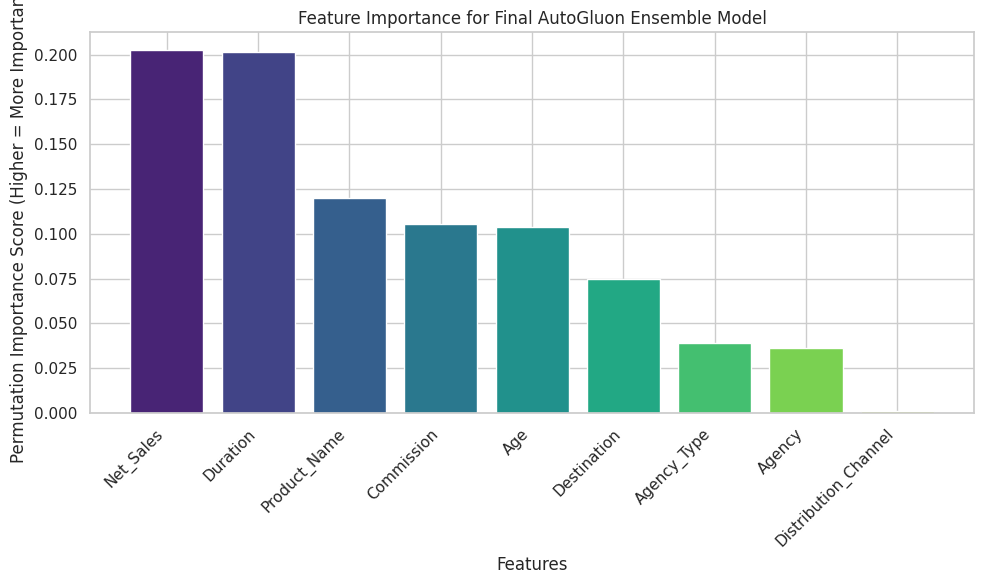

In [47]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, scores, color=sns.color_palette("viridis", len(features)))
plt.title('Feature Importance for Final AutoGluon Ensemble Model')
plt.xlabel('Features')
plt.ylabel('Permutation Importance Score (Higher = More Important)')
plt.xticks(rotation=45, ha='right') # Rotate feature names for better visibility
plt.tight_layout() # Adjust layout to prevent labels from being cut off

Dapat dilihat bahwa fitur/kolom Duration adalah yang paling penting, kemudian diikuti dengan Duration, Net Sales, dan selanjutnya.

Apabila model yang kita buat ini ingin digunakan untuk memprediksi user yang akan mengajukan dan layak menerima Claim, maka kolom Destination harus dihapus sehingga dapat membantu menentukan durasi perjalanan dan produk asuransi yang mempunyai kemungkinan paling besar untuk menghasilkan Claim yang bisa di-klaim oleh calon user.

## Conclusion and Recommendation

### Conclusion

Model untuk proyek Travel Insurance Claim menghasilkan pencapaian yang luar biasa menggunakan autoML via AutoGluon.

Model WeightedEnsemble_L2 menunjukkan performa dan prediksi yang luar biasa seperti:


* High Accuracy: Menghasilkan 97% akurasi dari blind test data
* Excellent Generalization: Tingginya akurasi biasanya akan menyebabkan overfitting, tapi ketika validation score nya menunjukkan 0.9772 maka selaras dengan performa testnnya
* Optimal Risk Mitigation:
  1. Model menghasilkan 96% Recall sehingga dapat meminimalisir penolakan terhadap user yang harusnya layak menerima claim
  2. Model menghasilkan 99% Precision sehingga dapat meminimalisir finansial loss dari invalid user claim

Model ini memenuhi persyaratan praktis dan sangat efektif digunakan apabila tidak terdapat terlalu banyak nilai kuantitatif yang melebihi Outliers atau batasan yang diterapkan perusahaan Travel Insurance Claim



### Recommendation



* Mewajibkan user asuransi untuk mengisi data secara lengkap, termasuk kolom Gender. sehingga tidak membuang waktu dan kinerja perusahaan untuk menganalisis ribuan data dengan nilai kosong.
* Investigasi Residual Error, analisa kembali False Negative (missed invalid claim) dan False Positive (invalid claim approved). Memahami kembali 1-4% dari sisa kesalahan sebagai dasar untuk pengumpulan data dimasa mendatang atau aturan peninjauan secara manual untuk kasus khusus
* Menambah fitur yang mungkin mempengaruhi Claim, seperti indikator ekonomi makro, kondisi cuaca pada tanggal perjalanan, atau data loyalitas user
